# Temperature Prediction

## Objective
Predict the **temperature** based on humidity data.


## Dataset Overview
The dataset contains hourly or daily readings of humidity and temperature.


## Workflow
1. Load the dataset  
2. Explore and clean the data  
3. Train a regression model  
4. Evaluate predictions


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv('humidity.csv')
df.head()

,sensor_id,lat,lon,pressure,temperature,humidity
0,2266,42.738,23.272,95270.27,23.46,62.48
1,2292,42.663,23.273,94355.83,23.06,59.46
2,3096,42.700,23.360,95155.81,26.53,44.38
3,3428,42.624,23.406,94679.57,28.34,38.28
4,3472,42.669,23.318,94327.88,26.31,46.37


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701548 entries, 0 to 701547
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   sensor_id    701548 non-null  int64  
 1   lat          701548 non-null  float64
 2   lon          701548 non-null  float64
 3   pressure     701548 non-null  float64
 4   temperature  701548 non-null  float64
 5   humidity     701548 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 32.1 MB


In [4]:
df.describe()

,sensor_id,lat,lon,pressure,temperature,humidity
count,701548.000000,701548.000000,701548.000000,701548.000000,701548.000000,701548.000000
mean,2835.419842,42.679722,23.333739,94965.292500,24.754990,48.348949
std,798.018890,0.025568,0.039365,2577.210945,14.013001,20.907247
min,1764.000000,42.622000,23.240000,0.000000,-145.120000,0.000000
25%,2224.000000,42.665000,23.310000,94528.017500,20.630000,34.140000
50%,2323.000000,42.685000,23.332000,95005.480000,24.780000,48.350000
75%,3474.000000,42.694000,23.360000,95405.132500,29.870000,62.940000
max,4661.000000,42.738000,23.419000,164926.750000,61.170000,100.000000


## Exploratory Data Analysis


## Data Preprocessing

In [5]:
# Drop any rows with missing values
df.isnull().sum()


sensor_id      0
lat            0
lon            0
pressure       0
temperature    0
humidity       0
dtype: int64

In [6]:
df_filtered = df[
    (df['temperature'] > -50) &
    (df['temperature'] < 60) &
    (df['humidity'] > 0) &
    (df['humidity'] <80)
    ]


C:\Users\DELL\AppData\Local\Temp\ipykernel_20868\1477822019.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


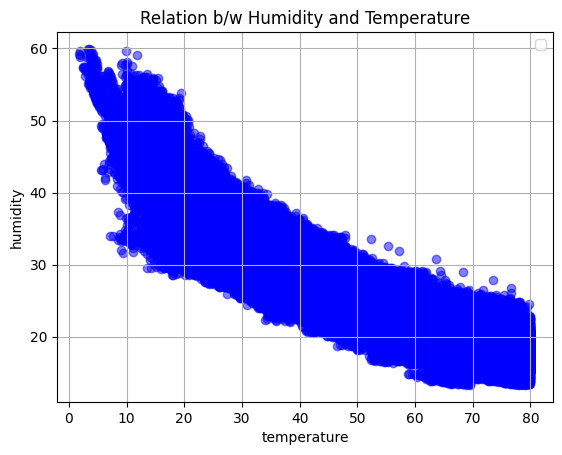

In [7]:
plt.scatter(df_filtered['humidity'], df_filtered['temperature'], color='blue',alpha=0.5,marker='o')
plt.xlabel('temperature')
plt.ylabel('humidity')
plt.title('Relation b/w Humidity and Temperature')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
x = df_filtered[['humidity']]
y = df_filtered[['temperature']]


## Model Training

In [9]:
# Linear Regression
model = LinearRegression()
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
model.fit(x_train,y_train)
model.score(x_test,y_test)



0.812641466913754

In [10]:
# Predict
model.fit(df_filtered[['humidity']],df_filtered['temperature'])
humidity_input = float(input("Enter the value of humidity"))
predicted_temp = model.predict([[humidity_input]])
print(f"The value of predicted temperature is : {predicted_temp[0]:.2f} degree celcius")


The value of predicted temperature is : 25.48 degree celcius


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Evaluation


In [11]:
# Evaluate model performance
print("R^2 score : ", model.score(x_test,y_test))


R^2 score :  0.8126464340159165


## Conclusion
- A simple linear regression model was used to predict temperature from humidity.  
- Consider using polynomial regression or time-series models for more complex patterns.


In [12]:
df.lat.unique()

array([42.738, 42.663, 42.7  , 42.624, 42.669, 42.709, 42.64 , 42.683,
       42.693, 42.704, 42.678, 42.666, 42.657, 42.69 , 42.68 , 42.685,
       42.66 , 42.651, 42.665, 42.686, 42.664, 42.71 , 42.645, 42.692,
       42.671, 42.677, 42.691, 42.622, 42.702, 42.694, 42.703, 42.662,
       42.675, 42.689, 42.654, 42.698, 42.625, 42.629, 42.706, 42.708])

In [13]:
df.lon.unique()

array([23.272, 23.273, 23.36 , 23.406, 23.318, 23.398, 23.31 , 23.335,
       23.333, 23.293, 23.354, 23.254, 23.359, 23.284, 23.349, 23.324,
       23.301, 23.319, 23.332, 23.392, 23.351, 23.373, 23.419, 23.265,
       23.311, 23.356, 23.364, 23.366, 23.371, 23.32 , 23.4  , 23.368,
       23.357, 23.33 , 23.325, 23.289, 23.278, 23.291, 23.321, 23.316,
       23.24 , 23.38 , 23.308, 23.307])

In [14]:
df.pressure.unique()

array([95270.27, 94355.83, 95155.81, ..., 96092.94, 93564.17, 96070.06])

In [16]:
df_filtered = df[
    (df['temperature'] > -50) &
    (df['temperature'] < 60) &
    (df['humidity'] > 0) &
    (df['humidity'] <80) &
    (df['lat']<43) &
    (df['lon'] <24) &
    (df['pressure'] <97000)
    ]

In [18]:
x = df_filtered[['humidity','lat','lon','pressure']]
y = df_filtered[['temperature']]


In [19]:
# Linear Regression
model = LinearRegression()
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
model.fit(x_train,y_train)
model.score(x_test,y_test)



0.8207216784449076

In [23]:
# Predict
model.fit(df_filtered[['humidity','lat','lon','pressure']],df_filtered['temperature'])
humidity_input = float(input("Enter the value of humidity"))
lat_input = float(input("Enter the value of latitude"))
lon_input = float(input("Enter the value of longitude"))
pressure_input = float(input("Enter the value of pressure"))
predicted_temp = model.predict([[humidity_input,lat_input,lon_input,pressure_input]])
print(f"The value of predicted temperature is : {predicted_temp[0]:.2f} degree celcius")


The value of predicted temperature is : 21.72 degree celcius


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [22]:
# Evaluate model performance
print("R^2 score : ", model.score(x_test,y_test))

R^2 score :  0.8207247664291233


In [3]:
import zipfile
with zipfile.ZipFile("Temperature_ Prediction_Test.zip",'w') as zipf:
    zipf.write('Temperature_ Prediction_Test.ipynb')
print('File Zipped Successfully')

File Zipped Successfully
